In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from matplotlib import pyplot
import seaborn as sns

In [5]:
summaries_df = pd.read_csv("text_complexity_model_summaries.csv", index_col=False)
summaries_df.head()

,Unnamed: 0,#id,sentence_length,characters_per_word,syllables_per_word,text_length,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,...,Temporal.Synchronous,Contingency.Purpose.Arg2-as-goal,Expansion.Exception.Arg1-as-except,Expansion.Level-of-detail.Arg2-as-detail,Expansion.Substitution.Arg1-as-subst,Contingency.Condition.Arg1-as-cond,Expansion.Instantiation.Arg2-as-instance,Contingency.Condition.Arg2-as-cond,Expansion.Equivalence,Expansion.Manner.Arg2-as-manner
0,0,summary_FFN_maz-10110,21.800000,5.825688,2.119266,109,5.600000,7.000000,1.000000,0.200000,...,0,0,0,0,0,0,0,1,1,1
1,1,summary_FFN_maz-10175,15.500000,7.000000,2.387097,31,4.500000,7.000000,0.500000,0.500000,...,2,0,0,0,0,0,0,0,0,0
2,2,summary_FFN_maz-10205,17.666667,5.820755,2.066038,106,5.500000,6.666667,1.000000,0.500000,...,1,1,0,0,0,0,0,0,0,0
3,3,summary_FFN_maz-10207,27.714286,5.690722,1.979381,194,8.428571,7.857143,1.428571,0.714286,...,2,5,0,0,0,0,0,1,0,0
4,4,summary_FFN_maz-10374,25.500000,5.303922,1.872549,102,6.500000,7.500000,0.500000,0.750000,...,3,2,0,0,0,0,0,0,1,0


In [6]:
summaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 55 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      166 non-null    int64  
 1   #id                                             166 non-null    object 
 2   sentence_length                                 166 non-null    float64
 3   characters_per_word                             166 non-null    float64
 4   syllables_per_word                              166 non-null    float64
 5   text_length                                     166 non-null    int64  
 6   noun_phrases_per_sent                           166 non-null    float64
 7   tree_height                                     166 non-null    float64
 8   sub_clauses_per_sent                            166 non-null    float64
 9   sents_with_verb_as_root                    

In [5]:
summaries_df.describe()

,Unnamed: 0,sentence_length,characters_per_word,syllables_per_word,text_length,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,sents_with_nouns_as_root,...,Temporal.Synchronous,Contingency.Purpose.Arg2-as-goal,Expansion.Exception.Arg1-as-except,Expansion.Level-of-detail.Arg2-as-detail,Expansion.Substitution.Arg1-as-subst,Contingency.Condition.Arg1-as-cond,Expansion.Instantiation.Arg2-as-instance,Contingency.Condition.Arg2-as-cond,Expansion.Equivalence,Expansion.Manner.Arg2-as-manner
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.0,166.000000,166.000000,166.0,166.000000,166.000000,166.000000,166.000000
mean,82.500000,19.464876,5.830316,2.080962,86.481928,5.386666,6.655278,1.127008,0.370260,0.025550,...,1.030120,1.512048,0.0,0.006024,0.030120,0.0,0.042169,0.259036,0.271084,0.024096
std,48.064193,4.864737,0.446521,0.171405,36.039158,1.427222,1.063664,0.642181,0.266940,0.080729,...,1.081103,1.301458,0.0,0.077615,0.203744,0.0,0.201582,0.491512,0.543843,0.153812
min,0.000000,9.000000,4.500000,1.702128,9.000000,2.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,41.250000,16.250000,5.538099,1.975250,57.250000,4.425000,6.000000,0.666667,0.166667,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,82.500000,19.000000,5.783268,2.067741,93.000000,5.200000,6.690477,1.000000,0.375000,0.000000,...,1.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,123.750000,21.800000,6.126052,2.173118,109.000000,6.000000,7.300000,1.500000,0.500000,0.000000,...,2.000000,2.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,165.000000,34.000000,7.000000,2.500000,194.000000,11.200000,10.000000,4.200000,1.000000,0.500000,...,4.000000,6.000000,0.0,1.000000,2.000000,0.0,1.000000,2.000000,4.000000,1.000000


In [7]:
lexica_corpus_df = pd.read_csv("text_complexity_lexica_corpus.csv")
lexica_corpus_df = lexica_corpus_df.drop(["Unnamed: 0"],  axis='columns')

In [8]:
lexica_corpus_df.describe()

,#label,sentence_length,characters_per_word,syllables_per_word,text_length,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,sents_with_nouns_as_root,...,Temporal.Synchronous,Contingency.Purpose.Arg2-as-goal,Expansion.Exception.Arg1-as-except,Expansion.Level-of-detail.Arg2-as-detail,Expansion.Substitution.Arg1-as-subst,Contingency.Condition.Arg1-as-cond,Expansion.Instantiation.Arg2-as-instance,Contingency.Condition.Arg2-as-cond,Expansion.Equivalence,Expansion.Manner.Arg2-as-manner
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,...,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.500000,11.011828,5.492732,1.966788,179.377401,3.544651,4.784532,0.521438,0.403331,0.050860,...,1.847458,1.160452,0.006780,0.028249,0.030508,0.001130,0.232768,0.384181,0.933333,0.030508
std,0.408479,4.430873,0.703276,0.287375,103.202016,1.477773,1.211761,0.483947,0.170725,0.063408,...,1.925774,1.634337,0.082106,0.178904,0.178532,0.033615,0.492075,0.853114,1.229845,0.196624
min,0.000000,4.312500,4.202128,1.485981,12.000000,1.333333,2.666667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.550000,4.988189,1.759036,103.000000,2.444444,3.892857,0.166667,0.307692,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,10.047619,5.274775,1.879562,153.000000,3.260870,4.534884,0.428571,0.410256,0.040000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,13.111111,6.003367,2.154930,238.000000,4.230769,5.350000,0.714286,0.500000,0.083333,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,46.000000,7.821429,3.062500,544.000000,18.000000,12.000000,3.600000,1.000000,0.500000,...,12.000000,14.000000,1.000000,2.000000,2.000000,1.000000,3.000000,7.000000,7.000000,2.000000


In [9]:
miniklexi_data = lexica_corpus_df.loc[lexica_corpus_df["#label"] == 0.0]
klexikon_data = lexica_corpus_df.loc[lexica_corpus_df["#label"] == 0.5]
wiki_data = lexica_corpus_df.loc[lexica_corpus_df["#label"] == 1.0]

In [9]:
miniklexi_data.describe()

,#label,sentence_length,characters_per_word,syllables_per_word,text_length,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,sents_with_nouns_as_root,...,Temporal.Synchronous,Contingency.Purpose.Arg2-as-goal,Expansion.Exception.Arg1-as-except,Expansion.Level-of-detail.Arg2-as-detail,Expansion.Substitution.Arg1-as-subst,Contingency.Condition.Arg1-as-cond,Expansion.Instantiation.Arg2-as-instance,Contingency.Condition.Arg2-as-cond,Expansion.Equivalence,Expansion.Manner.Arg2-as-manner
count,295.0,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,...,295.000000,295.000000,295.000000,295.0,295.000000,295.0,295.000000,295.000000,295.000000,295.000000
mean,0.0,7.054025,4.949909,1.756344,122.738983,2.283020,3.696519,0.133149,0.403003,0.064240,...,0.871186,0.583051,0.003390,0.0,0.003390,0.0,0.135593,0.230508,0.738983,0.010169
std,0.0,0.919316,0.312204,0.125190,34.149078,0.319677,0.335639,0.125547,0.133857,0.055576,...,1.048331,0.790495,0.058222,0.0,0.058222,0.0,0.371503,0.595692,0.934781,0.130012
min,0.0,4.312500,4.202128,1.485981,39.000000,1.333333,2.666667,0.000000,0.083333,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,6.418860,4.720209,1.663825,100.500000,2.064583,3.490741,0.047619,0.315789,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,6.947368,4.960894,1.757812,116.000000,2.266667,3.705882,0.105263,0.388889,0.062500,...,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.0,7.616848,5.159234,1.837531,140.000000,2.458042,3.927249,0.200000,0.500000,0.105263,...,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,0.0,10.200000,6.162162,2.180723,267.000000,3.615385,4.600000,0.666667,0.750000,0.214286,...,8.000000,3.000000,1.000000,0.0,1.000000,0.0,2.000000,4.000000,4.000000,2.000000


In [10]:
klexikon_data.describe()

,#label,sentence_length,characters_per_word,syllables_per_word,text_length,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,sents_with_nouns_as_root,...,Temporal.Synchronous,Contingency.Purpose.Arg2-as-goal,Expansion.Exception.Arg1-as-except,Expansion.Level-of-detail.Arg2-as-detail,Expansion.Substitution.Arg1-as-subst,Contingency.Condition.Arg1-as-cond,Expansion.Instantiation.Arg2-as-instance,Contingency.Condition.Arg2-as-cond,Expansion.Equivalence,Expansion.Manner.Arg2-as-manner
count,295.0,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,...,295.000000,295.000000,295.000000,295.0,295.000000,295.0,295.000000,295.000000,295.000000,295.000000
mean,0.5,10.329835,5.205402,1.839047,271.101695,3.309992,4.643411,0.532571,0.465378,0.058172,...,2.664407,2.013559,0.013559,0.0,0.047458,0.0,0.362712,0.861017,1.637288,0.071186
std,0.0,1.343903,0.256719,0.103677,82.544957,0.469772,0.433024,0.192796,0.109022,0.048664,...,2.021800,1.950009,0.115849,0.0,0.212977,0.0,0.577909,1.188525,1.482540,0.282753
min,0.5,6.823529,4.669967,1.557047,113.000000,2.122449,3.476190,0.062500,0.121212,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.5,9.452272,5.023302,1.760814,208.500000,2.973099,4.333333,0.388889,0.390873,0.000000,...,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.5,10.187500,5.178694,1.838926,254.000000,3.275862,4.594595,0.500000,0.466667,0.051282,...,2.000000,2.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.5,11.217647,5.350783,1.907474,326.000000,3.617216,4.925824,0.637073,0.540064,0.089899,...,4.000000,3.000000,0.000000,0.0,0.000000,0.0,1.000000,1.000000,3.000000,0.000000
max,0.5,14.578947,6.473684,2.181287,462.000000,4.750000,6.111111,1.375000,0.739130,0.200000,...,9.000000,11.000000,1.000000,0.0,1.000000,0.0,3.000000,7.000000,7.000000,2.000000


In [11]:
wiki_data.describe()

,#label,sentence_length,characters_per_word,syllables_per_word,text_length,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,sents_with_nouns_as_root,...,Temporal.Synchronous,Contingency.Purpose.Arg2-as-goal,Expansion.Exception.Arg1-as-except,Expansion.Level-of-detail.Arg2-as-detail,Expansion.Substitution.Arg1-as-subst,Contingency.Condition.Arg1-as-cond,Expansion.Instantiation.Arg2-as-instance,Contingency.Condition.Arg2-as-cond,Expansion.Equivalence,Expansion.Manner.Arg2-as-manner
count,295.0,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,...,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,1.0,15.651624,6.322885,2.304974,144.291525,5.040940,6.013665,0.898593,0.341614,0.030169,...,2.006780,0.884746,0.003390,0.084746,0.040678,0.003390,0.200000,0.061017,0.423729,0.010169
std,0.0,4.312208,0.503768,0.215233,105.586940,1.531188,1.179507,0.597612,0.223946,0.077263,...,2.076747,1.569351,0.058222,0.302379,0.214380,0.058222,0.478091,0.253558,0.824856,0.130012
min,1.0,7.250000,4.719512,1.682927,12.000000,2.500000,3.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,13.000000,5.994445,2.152681,64.000000,4.166667,5.250000,0.500000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,14.800000,6.347222,2.303665,115.000000,4.750000,5.800000,0.800000,0.333333,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,17.333333,6.663120,2.432692,201.500000,5.591667,6.489130,1.111111,0.500000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,46.000000,7.821429,3.062500,544.000000,18.000000,12.000000,3.600000,1.000000,0.500000,...,12.000000,14.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,5.000000,2.000000


### Baseline Features

In [10]:
bl = summaries_df[["sentence_length", "characters_per_word", "syllables_per_word", "text_length"]]
bl.describe()

,sentence_length,characters_per_word,syllables_per_word,text_length
count,166.000000,166.000000,166.000000,166.000000
mean,19.464876,5.830316,2.080962,86.481928
std,4.864737,0.446521,0.171405,36.039158
min,9.000000,4.500000,1.702128,9.000000
25%,16.250000,5.538099,1.975250,57.250000
50%,19.000000,5.783268,2.067741,93.000000
75%,21.800000,6.126052,2.173118,109.000000
max,34.000000,7.000000,2.500000,194.000000


array([[<AxesSubplot:title={'center':'sentence_length'}>,
        <AxesSubplot:title={'center':'characters_per_word'}>],
       [<AxesSubplot:title={'center':'syllables_per_word'}>,
        <AxesSubplot:title={'center':'text_length'}>]], dtype=object)

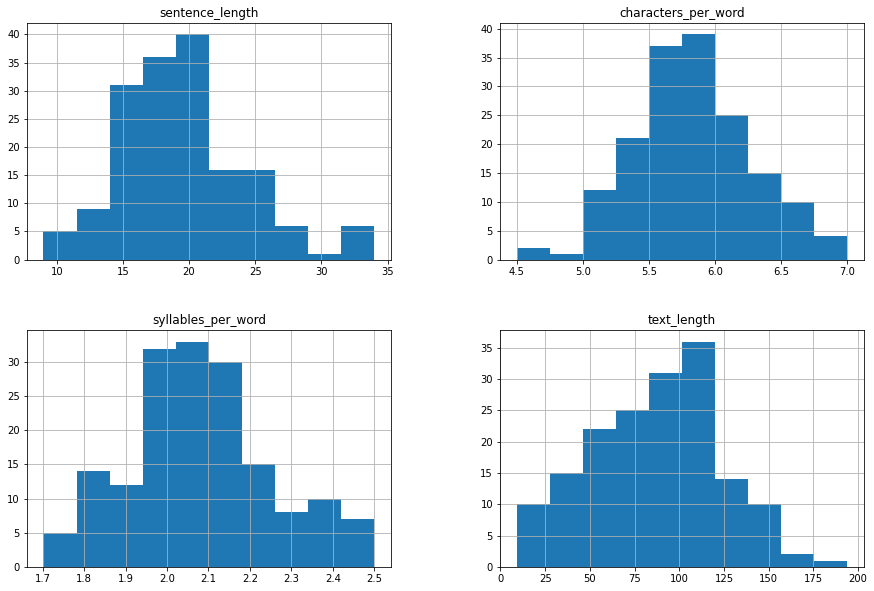

In [18]:
bl.hist(figsize=(15,10))

In [13]:
miniklexi_data[["sentence_length", "characters_per_word", "syllables_per_word", "text_length"]].describe()

,sentence_length,characters_per_word,syllables_per_word,text_length
count,295.000000,295.000000,295.000000,295.000000
mean,7.054025,4.949909,1.756344,122.738983
std,0.919316,0.312204,0.125190,34.149078
min,4.312500,4.202128,1.485981,39.000000
25%,6.418860,4.720209,1.663825,100.500000
50%,6.947368,4.960894,1.757812,116.000000
75%,7.616848,5.159234,1.837531,140.000000
max,10.200000,6.162162,2.180723,267.000000


In [14]:
klexikon_data[["sentence_length", "characters_per_word", "syllables_per_word", "text_length"]].describe()

,sentence_length,characters_per_word,syllables_per_word,text_length
count,295.000000,295.000000,295.000000,295.000000
mean,10.329835,5.205402,1.839047,271.101695
std,1.343903,0.256719,0.103677,82.544957
min,6.823529,4.669967,1.557047,113.000000
25%,9.452272,5.023302,1.760814,208.500000
50%,10.187500,5.178694,1.838926,254.000000
75%,11.217647,5.350783,1.907474,326.000000
max,14.578947,6.473684,2.181287,462.000000


In [15]:
wiki_data[["sentence_length", "characters_per_word", "syllables_per_word", "text_length"]].describe()

,sentence_length,characters_per_word,syllables_per_word,text_length
count,295.000000,295.000000,295.000000,295.000000
mean,15.651624,6.322885,2.304974,144.291525
std,4.312208,0.503768,0.215233,105.586940
min,7.250000,4.719512,1.682927,12.000000
25%,13.000000,5.994445,2.152681,64.000000
50%,14.800000,6.347222,2.303665,115.000000
75%,17.333333,6.663120,2.432692,201.500000
max,46.000000,7.821429,3.062500,544.000000


### Syntactic Features

In [17]:
summaries_df[["noun_phrases_per_sent", "tree_height", "sub_clauses_per_sent", "sents_with_verb_as_root", "sents_with_nouns_as_root", "sentence_length"]].describe()

,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,sents_with_nouns_as_root,sentence_length
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,5.386666,6.655278,1.127008,0.370260,0.025550,19.464876
std,1.427222,1.063664,0.642181,0.266940,0.080729,4.864737
min,2.000000,4.000000,0.000000,0.000000,0.000000,9.000000
25%,4.425000,6.000000,0.666667,0.166667,0.000000,16.250000
50%,5.200000,6.690477,1.000000,0.375000,0.000000,19.000000
75%,6.000000,7.300000,1.500000,0.500000,0.000000,21.800000
max,11.200000,10.000000,4.200000,1.000000,0.500000,34.000000


In [18]:
miniklexi_data[["noun_phrases_per_sent", "tree_height", "sub_clauses_per_sent", "sents_with_verb_as_root", "sents_with_nouns_as_root", "sentence_length"]].describe()

,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,sents_with_nouns_as_root,sentence_length
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,2.283020,3.696519,0.133149,0.403003,0.064240,7.054025
std,0.319677,0.335639,0.125547,0.133857,0.055576,0.919316
min,1.333333,2.666667,0.000000,0.083333,0.000000,4.312500
25%,2.064583,3.490741,0.047619,0.315789,0.000000,6.418860
50%,2.266667,3.705882,0.105263,0.388889,0.062500,6.947368
75%,2.458042,3.927249,0.200000,0.500000,0.105263,7.616848
max,3.615385,4.600000,0.666667,0.750000,0.214286,10.200000


In [19]:
klexikon_data[["noun_phrases_per_sent", "tree_height", "sub_clauses_per_sent", "sents_with_verb_as_root", "sents_with_nouns_as_root", "sentence_length"]].describe()

,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,sents_with_nouns_as_root,sentence_length
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,3.309992,4.643411,0.532571,0.465378,0.058172,10.329835
std,0.469772,0.433024,0.192796,0.109022,0.048664,1.343903
min,2.122449,3.476190,0.062500,0.121212,0.000000,6.823529
25%,2.973099,4.333333,0.388889,0.390873,0.000000,9.452272
50%,3.275862,4.594595,0.500000,0.466667,0.051282,10.187500
75%,3.617216,4.925824,0.637073,0.540064,0.089899,11.217647
max,4.750000,6.111111,1.375000,0.739130,0.200000,14.578947


In [20]:
wiki_data[["noun_phrases_per_sent", "tree_height", "sub_clauses_per_sent", "sents_with_verb_as_root", "sents_with_nouns_as_root", "sentence_length"]].describe()

,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,sents_with_verb_as_root,sents_with_nouns_as_root,sentence_length
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,5.040940,6.013665,0.898593,0.341614,0.030169,15.651624
std,1.531188,1.179507,0.597612,0.223946,0.077263,4.312208
min,2.500000,3.750000,0.000000,0.000000,0.000000,7.250000
25%,4.166667,5.250000,0.500000,0.200000,0.000000,13.000000
50%,4.750000,5.800000,0.800000,0.333333,0.000000,14.800000
75%,5.591667,6.489130,1.111111,0.500000,0.000000,17.333333
max,18.000000,12.000000,3.600000,1.000000,0.500000,46.000000
